# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [1]:
from scipy import stats 
import numpy as np

In [2]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [7]:
stats.ttest_1samp(GPU1,0)

Ttest_1sampResult(statistic=34.056241516158195, pvalue=7.228892044970457e-15)

In [ ]:
#since value of "pvalue" is less than 0.05, I will not accept null hypothesis. It means mean of GPU1 is not equal to 0.

## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [9]:
stats.ttest_ind(GPU1,GPU2)

Ttest_indResult(statistic=-2.627629513471839, pvalue=0.013794282041452725)

In [10]:
#Again here pvalue is less than 5%, so I will accepet alternate hypothesis.
#ans- There is a significant difference.

## Question 3

He is trying a third GPU - GPU3.

In [11]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [12]:
stats.ttest_ind(GPU1,GPU3)

Ttest_indResult(statistic=-1.4988943759093303, pvalue=0.14509210993138993)

In [13]:
#Here pvalue is greater than 5%. I will accept null hypothesis.
#Ans- There is no significant difference between data sets.

## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [15]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [17]:
stats.levene(e1,e2,e3)

LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)

In [18]:
#pvalue > 0.05(Test equality of variances is satisfied)
#Ans- There is no significant difference between data sets.

In [40]:
df1 = pd.DataFrame({'E': '1', 'eval':e1})
df2 = pd.DataFrame({'E': '2', 'eval':e2})
df3 = pd.DataFrame({'E': '3', 'eval':e3})

In [41]:
DF = pd.DataFrame()
DF=DF.append(df1)
DF=DF.append(df2)
DF=DF.append(df3)

In [42]:
DF.head()

,E,eval
0,1,1.59544
1,1,1.41973
2,1,0.00000
3,1,0.00000
0,2,1.43380


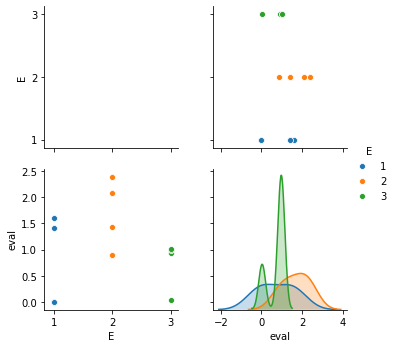

In [47]:
import matplotlib.pyplot as plt
import seaborn           as sns
sns.pairplot(DF,diag_kind='kde',hue='E')

In [53]:
#𝐻0 :  𝜇1  =  𝜇2  =  𝜇3
#𝐻𝐴 : At least one  𝜇  differs

In [57]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
A = ols('eval~E', data = DF).fit()
ATable = sm.stats.anova_lm(A, typ=2)
print(ATable)

            sum_sq   df         F    PR(>F)
E         2.399066  2.0  2.513576  0.135746
Residual  4.294994  9.0       NaN       NaN


In [55]:
#since pvalue is greater than 5%. so i will accept (𝐻0 :  𝜇1  =  𝜇2  =  𝜇3) null hypothesis.

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [59]:
 stats.f_oneway(e1,e2,e3)

F_onewayResult(statistic=2.51357622845924, pvalue=0.13574644501798466)

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

Typel - If null hyothesis is true, but i reject it and alternate hypothesis is accepted.
Typell - If null hypothesis is false but accepted.

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


#H0 - waiting time to place an order has not changed
#HA - waiting time to place an order has changed

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [60]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [104]:
css, pval, dof, exp_freq = stats.chi2_contingency(dice)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(css, pval,dof))

Chi-square statistic 23.31567 P value 0.077664 Degrees of freedom 15


In [63]:
stats.chi2_contingency(dice)

(23.315671914716496,
 0.07766367301496693,
 15,
 array([[ 5.57419355,  8.20645161,  5.57419355,  4.64516129],
        [ 6.50322581,  9.57419355,  6.50322581,  5.41935484],
        [ 6.73548387,  9.91612903,  6.73548387,  5.61290323],
        [ 6.96774194, 10.25806452,  6.96774194,  5.80645161],
        [ 5.34193548,  7.86451613,  5.34193548,  4.4516129 ],
        [ 4.87741935,  7.18064516,  4.87741935,  4.06451613]]))

## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [74]:
import scipy.stats as stats
B=stats.zscore(dice)
print(B)

[[-0.46291005 -0.18884739 -1.83711731  1.44115338]
 [ 1.38873015 -0.64208114  1.22474487  0.        ]
 [ 0.9258201   0.7176201   0.61237244 -1.44115338]
 [-0.9258201   1.62408759  0.61237244 -0.96076892]
 [-1.38873015  0.03776948  0.          0.        ]
 [ 0.46291005 -1.54854863 -0.61237244  0.96076892]]


In [85]:
print("Mean",B.mean())
print("Std_Dev",B.std())

Mean -3.700743415417188e-17
Std_Dev 1.0


In [100]:
PV=stats.norm.sf(abs(B))
print(PV)
print("\n")
print("mean",PV.mean())

[[0.32171442 0.42510621 0.03309629 0.07477068]
 [0.08245741 0.26041025 0.11033568 0.5       ]
 [0.17726974 0.23649578 0.27014569 0.07477068]
 [0.17726974 0.05217856 0.27014569 0.16833418]
 [0.08245741 0.48493574 0.5        0.5       ]
 [0.32171442 0.06074513 0.27014569 0.16833418]]


mean 0.23428473233691496


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [86]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

In [102]:
print(stats.ttest_rel(before,after))


Ttest_relResult(statistic=5.157393546865148, pvalue=3.6177683298365057e-07)


In [ ]:
#Yes, weight-loss drug worksfor the same group patients before and after treatment.
